# Imports and Requirements
For this project, we need the data sets and some python libraries

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import psutil
from IPython.display import Image


## Reading and cleaning the data

In [2]:
df_original = pd.read_csv('./data/chemicals-in-cosmetics.csv')
df = df_original.drop_duplicates()
print('The original data had ', df_original.shape[0], "rows")
print('After removing duplicates, the data has', df.shape[0], "rows")

The original data had  112870 rows
After removing duplicates, the data has 112616 rows


### Sampling the data

In [3]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


# Analysis
Let us look at the total number of chemicals that we have in our dataset

In [4]:
df['ChemicalName'].value_counts().size

123

It seems that we have a total of 123 chemicals in our given data

### Trends and Averages
Let us see what is the average number of reported chemicals, as well as the maximum and minimum for each product

In [5]:
df['ChemicalCount'].describe()

count    112616.000000
mean          1.282402
std           0.629696
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

This tells us that there are some products with no reported chemicals, and there arae some with as many as 9 reported chemicals.

However, the average seems to be around 1 chemical

### Removing some bias from our observations

It doesn't make sense that some products have no reported chemicals at all, so let us closely examine what we have

In [6]:
df.loc[df.ChemicalCount==0].head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
31,24,White Premium Lotion Soap,NaN,NaN,181,"GOJO Industries, Inc.",GOJO�,74,Personal Care Products,170,...,68603-42-9,26,Cocamide diethanolamine,07/23/2009,02/07/2012,NaN,07/23/2009,02/07/2012,12/30/2010,0
497,333,Gentle Cleanser,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,6,Bath Products,159,...,68603-42-9,350,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/02/2009,09/16/2013,11/23/2009,0
498,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,351,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/02/2009,09/03/2009,09/02/2009,0
499,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,68603-42-9,412,Cocamide diethanolamine,09/02/2009,09/16/2013,NaN,09/03/2009,12/05/2013,09/02/2009,0
500,334,Cleansing Foam,NaN,NaN,71,"Sunrider Manufacturing, L.P.",Kandesn,90,Skin Care Products,93,...,NaN,453,"Retinol/retinyl esters, when in daily dosages ...",09/02/2009,09/16/2013,NaN,09/03/2009,12/05/2013,12/05/2103,0


The number of chemicals being equal to zero suggests that the chemicals were removed from the product (reported in 'ChemicalDateRemoved'). This can be verified by checking if there are NaN values in this column.

In [7]:
df.loc[df.ChemicalCount==0]['ChemicalDateRemoved'].isnull().max()

False

In [8]:
df_n0 = df.loc[(df.ChemicalCount>0) & (df['DiscontinuedDate'].isna())]

The maximum number of chemicals that is reported in a product is 9. We can find these products:

In [9]:
df_n0.loc[df.ChemicalCount==9]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,123-91-1,33796,"1,4-Dioxane",02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-06-1,33797,Acrylamide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33798,Arsenic (inorganic arsenic compounds),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,79-43-6,33799,Dichloroacetic acid,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,75-21-8,33800,Ethylene oxide,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,50-00-0,33801,Formaldehyde (gas),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,7439-92-1,33802,Lead,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,NaN,33803,Cocamide diethanolamine (DEA),02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9
60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),25,...,107-21-1,33804,Ethylene glycol,02/04/2014,02/04/2014,NaN,02/04/2014,02/04/2014,NaN,9


Uh oh!

It turns out it is only one product, where each chemical is separately reported.

The following code is used to generate the bar chart showing the number of products per number of chemicals. In counting the number of products, different color, scent and/or flavor of the product are neglected (e.g. 'Professional Eyeshadow Base' can be beige or bright, but it is counted only once with the identification number 'CDPHId'=26).

In [10]:
df_n0.loc[df['CDPHId']==26]

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
32,26,Professional Eyeshadow Base,337.0,Beige,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1
33,26,Professional Eyeshadow Base,338.0,Bright,27,"CHANEL, INC",CHANEL,44,Makeup Products (non-permanent),48,...,13463-67-7,27,Titanium dioxide,08/10/2009,12/30/2010,NaN,08/10/2009,08/10/2009,NaN,1


In [11]:
data = df_n0.groupby(['ChemicalCount']).nunique()['CDPHId']


We have grouped everything by unique CDPHId, so that we have no outlier values

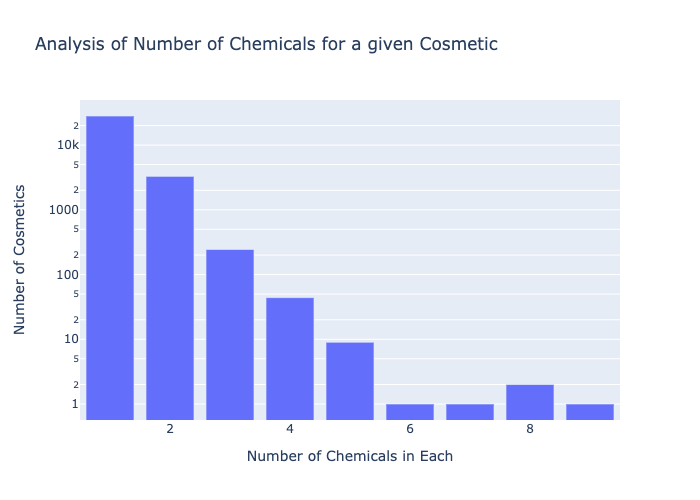

In [30]:
fig = px.bar(data, x=data.index, y=data.values, log_y=True, labels={
    "y":"Number of Cosmetics",
    "ChemicalCount":"Number of Chemicals in Each"
}, title="Analysis of Number of Chemicals for a given Cosmetic")
img_bytes = fig.to_image(format="png")
Image(img_bytes)